In [18]:
import numpy as np
from matplotlib import pyplot as plt
import tensorflow as tf
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense, SimpleRNN
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
import math


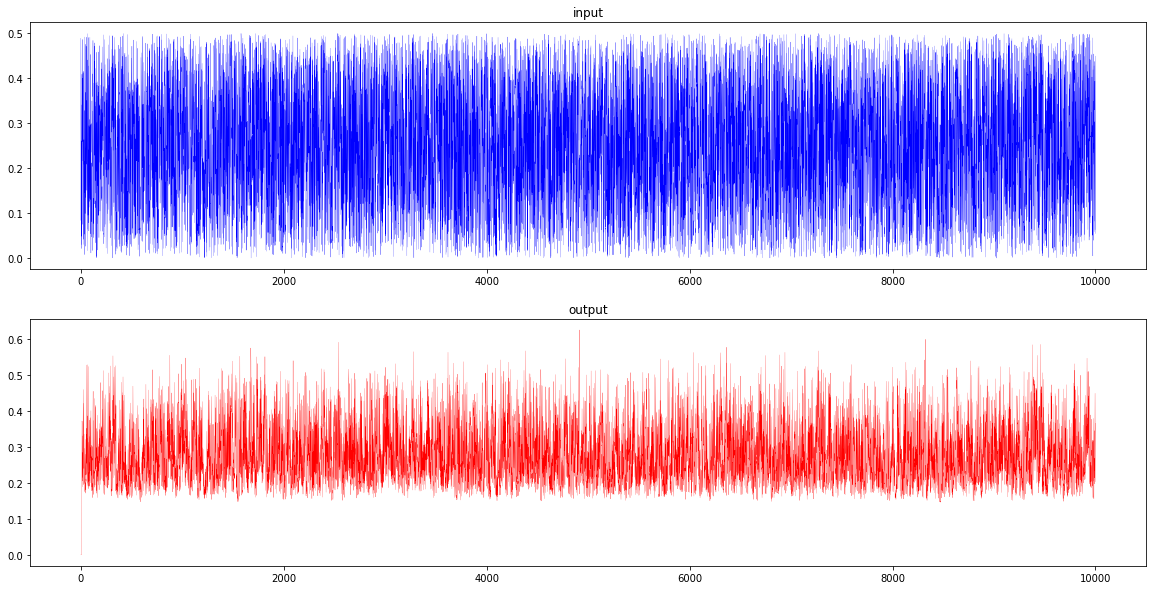

In [19]:
x, y = np.loadtxt("data.txt", delimiter=",")
t=np.arange(start=0,stop=len(x), step=1)

plt.figure(figsize = (20,10))
plt.subplot(2,1,1)
plt.title('input')
plt.plot(t,x, color = 'b', linewidth= 0.2)
plt.subplot(2,1,2)
plt.title('output')
plt.plot(t,y, color = 'r', linewidth = 0.2)

x_train = x[:4000]
x_valid = x[4000:5000]
x_test = x[5000:]

y_train = x[:4000]
y_valid = x[4000:5000]
y_test = x[5000:]

## RNN

In [20]:
def create_model(activation):
    model = Sequential()
    model.add(SimpleRNN(20,
                        activation=activation[0], return_sequences=True, stateful = True, batch_input_shape=(1,4000,1))) #stateful = True
    model.add(Dense(units=1, activation=activation[1]))
    learning_rate = 0.01
    model.compile(loss='mean_squared_error', optimizer='adam')
    return model

In [21]:
model = create_model(activation=['tanh', 'tanh'])
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 simple_rnn_2 (SimpleRNN)    (1, 4000, 20)             440       
                                                                 
 dense_2 (Dense)             (1, 4000, 1)              21        
                                                                 
Total params: 461
Trainable params: 461
Non-trainable params: 0
_________________________________________________________________


In [22]:
wx = model.get_weights()[0]
wh = model.get_weights()[1]
bh = model.get_weights()[2]
wy = model.get_weights()[3]
by = model.get_weights()[4]
 
print('wx = ', wx, ' wh = ', wh, ' bh = ', bh, ' wy =', wy, 'by = ', by)




wx =  [[-0.05060723  0.37332195 -0.21702334  0.19608366  0.43094492 -0.15681374
   0.12142491  0.09556377 -0.01679254  0.08854181  0.34026796  0.12111282
  -0.5201699  -0.00757998 -0.37606028  0.2958336  -0.38083637  0.45348585
  -0.52758884 -0.06098557]]  wh =  [[ 6.91756010e-02 -7.38727674e-02  1.76960453e-01 -2.69084096e-01
   8.49402845e-02  5.74623421e-02 -2.60858685e-01  4.90587205e-02
   1.35095164e-01 -1.58952877e-01 -2.82428768e-02  3.83515120e-01
  -1.38376907e-01  2.91439325e-01 -2.24690408e-01 -5.60342185e-02
  -2.12879032e-01 -2.32314959e-01  4.61638253e-03  5.97199798e-01]
 [-3.52427922e-02  1.29379109e-01  1.89238250e-01 -5.40031344e-02
   2.67319987e-03 -4.02599692e-01 -5.11424653e-02 -6.70636147e-02
  -1.73951671e-01  2.17921346e-01 -3.29700202e-01  3.48396868e-01
  -8.18834677e-02 -4.23764825e-01 -2.51374334e-01  3.12381506e-01
   2.87184954e-01 -1.89133078e-01  9.20907129e-03 -2.94822156e-02]
 [-1.70091763e-01 -4.50709879e-01  1.55118853e-02  1.80363372e-01
   2.8204

In [23]:
print(x_train.shape)

(4000,)


In [24]:

X_train = np.reshape(x_train, (1,len(x_train),1))
Y_train = np.reshape(y_train, (1,len(y_train),1))

X_valid = np.reshape(x_valid, (1,len(x_valid),1))
Y_valid = np.reshape(y_valid, (1,len(y_valid),1))

print(X_train.shape)
print(Y_train.shape)

print(X_valid.shape)
print(Y_valid.shape)


model.evaluate(X_train, Y_train)
#history = model.fit(X_train, Y_train, epochs = 100, validation_data = (X_valid, Y_valid))
history = model.fit(X_train, Y_train,validation_data = (X_valid, Y_valid), epochs = 30).history




(1, 4000, 1)
(1, 4000, 1)
(1, 1000, 1)
(1, 1000, 1)
1/1 [==============================] - 0s 272ms/step - loss: 0.0346
Epoch 1/30
1/1 [==============================] - 1s 1s/step - loss: 0.0346 - val_loss: 0.0308
Epoch 2/30
1/1 [==============================] - 0s 400ms/step - loss: 0.0300 - val_loss: 0.0268
Epoch 3/30
1/1 [==============================] - 0s 398ms/step - loss: 0.0262 - val_loss: 0.0237
Epoch 4/30
1/1 [==============================] - 0s 401ms/step - loss: 0.0231 - val_loss: 0.0211
Epoch 5/30
1/1 [==============================] - 0s 429ms/step - loss: 0.0208 - val_loss: 0.0192
Epoch 6/30
1/1 [==============================] - 0s 396ms/step - loss: 0.0189 - val_loss: 0.0175
Epoch 7/30
1/1 [==============================] - 0s 431ms/step - loss: 0.0174 - val_loss: 0.0161
Epoch 8/30
1/1 [==============================] - 0s 388ms/step - loss: 0.0161 - val_loss: 0.0149
Epoch 9/30
1/1 [==============================] - 0s 429ms/step - loss: 0.0148 - val_loss: 0.0137
E

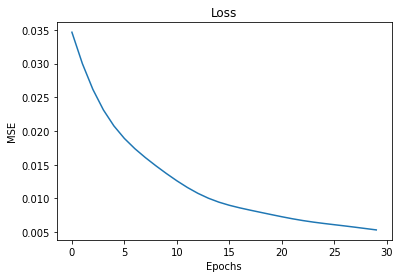

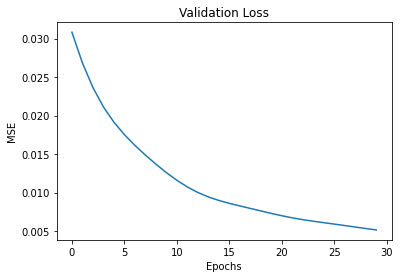

In [25]:
plt.plot(history['loss'])
plt.title('Loss')
plt.xlabel('Epochs')
plt.ylabel('MSE')


plt.show()

plt.plot(history['val_loss'])
plt.title('Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('MSE')


plt.show()

1/1 [==============================] - 0s 37ms/step - loss: 0.0051


0.00514825526624918

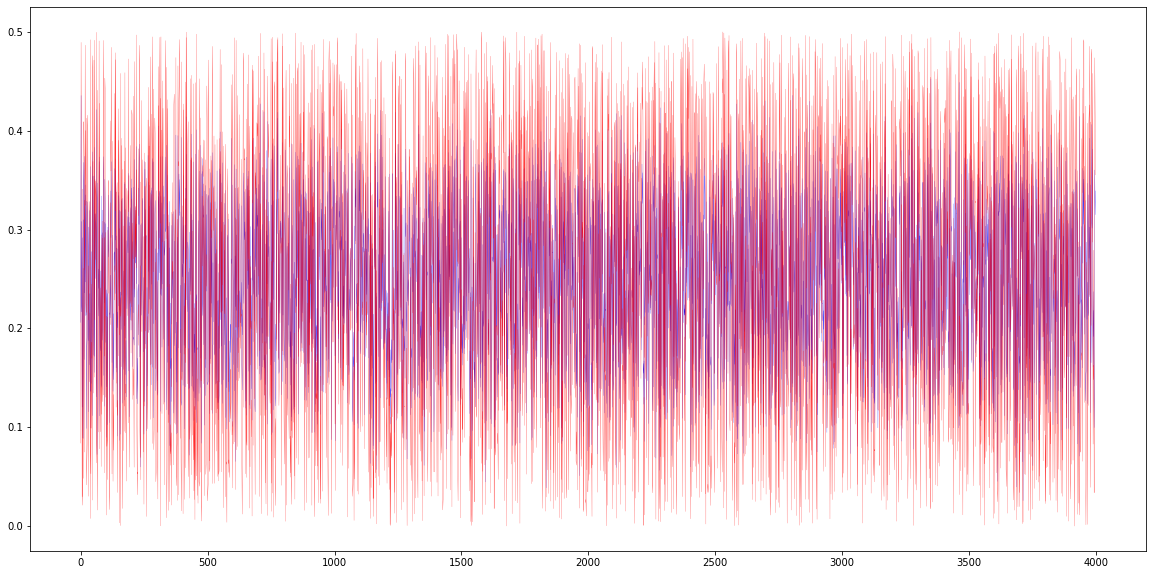

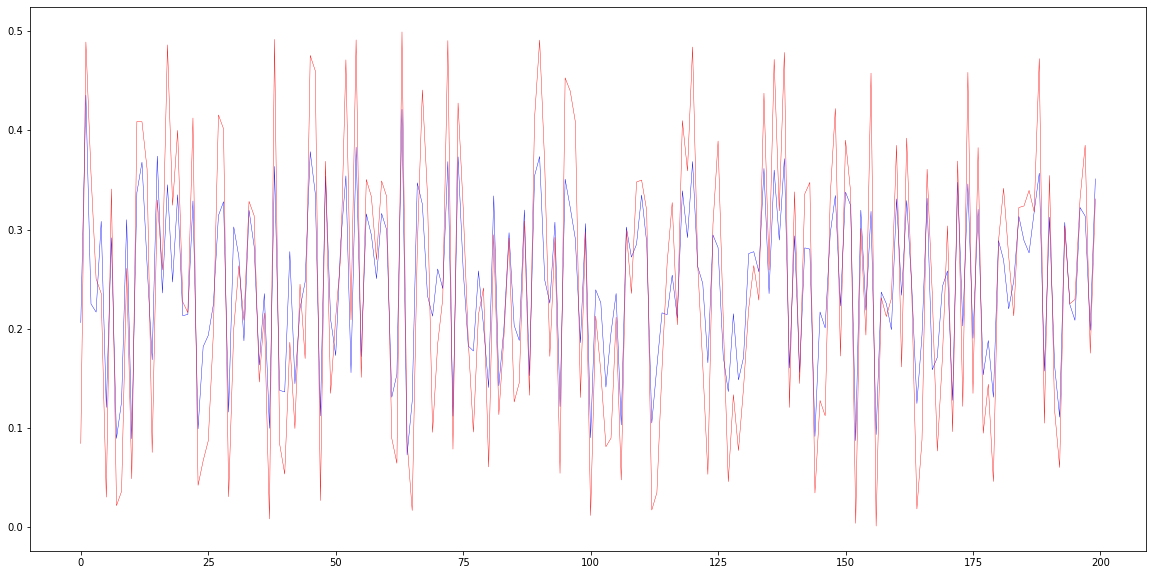

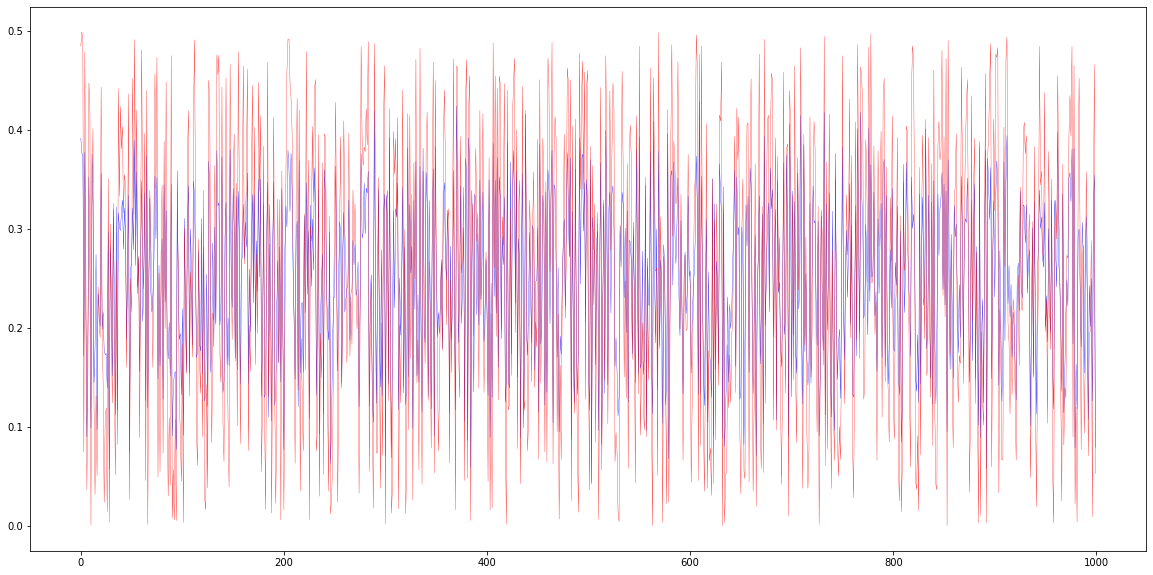

In [26]:
y = model.predict(X_train)
t=np.arange(start=0,stop=len(X_train[0]), step=1)
plt.figure(figsize = (20,10))
plt.plot(t,y.ravel(), color = 'b', linewidth= 0.2)
plt.plot(t,Y_train.ravel(), color = 'r', linewidth= 0.2)
model.evaluate(X_train, Y_train)

plt.figure(figsize = (20,10))
plt.plot(t[:200],y.ravel()[:200], color = 'b', linewidth= 0.4)
plt.plot(t[:200],Y_train.ravel()[:200], color = 'r', linewidth= 0.4)

y = model.predict(X_valid)
t=np.arange(start=0,stop=len(X_valid[0]), step=1)
plt.figure(figsize = (20,10))
plt.plot(t,y.ravel(), color = 'b', linewidth= 0.3)
plt.plot(t,Y_valid.ravel(), color = 'r', linewidth= 0.3)
model.evaluate(X_valid, Y_valid)

